In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',104)
import seaborn as sns
import pandas_profiling
import datetime as dt

%matplotlib inline

In [100]:

store_df = pd.read_csv('data/0826export.csv')
store_df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [101]:
## read master file in dataframe
df1 = pd.read_excel('data/store_master.xlsx')

In [102]:
## created a seperate file for 41 columns and read in dataframe
updated_df = pd.read_csv('data/0826export-updated.csv')
updated_df.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,COMP_PCT,MARK_DOWN_AMT_TY,PAYROLL_ADJ_HOURS,STRAK_TRAFFIC,STRAK_SALES_AMT,SPECIAL_ORDER_AMT,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_VALUE,TRANS_CNT_RETURNS,TY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,AVG_MGR_TENURE_DAYS,AVG_AM_TENURE_DAYS,AVG_FT_TENURE_DAYS,AVG_PT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,1504,2017,1,1,0.034622,1855.11,192,1168,22003.18,892.46,22003.18,63,9955.58,4240.92,193.37,2858.49,12047.60,0,0.084311,0.097603,18.838339,193.010351,6.250000,-0.062981,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,286.0,0.0,467.0,47.0,317
1,1504,2017,2,1,-0.255050,1986.70,181,891,17499.86,1913.86,17499.35,54,7630.28,3869.02,181.26,2593.15,9869.07,2,0.113530,0.105499,19.640123,186.163298,4.941490,-0.360549,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,293.0,0.0,474.0,54.0,324
2,1504,2017,3,1,-0.327715,1331.95,183,930,15004.60,2799.29,15004.60,65,9422.12,3751.73,183.26,2737.61,5582.48,0,0.088769,0.084946,16.133978,189.931646,5.103441,-0.412661,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,300.0,0.0,481.0,61.0,331
3,1504,2017,4,1,-0.261691,1744.41,183,812,12770.59,2273.05,12770.09,43,6204.59,3178.74,183.27,2366.12,6565.50,1,0.136601,0.088670,15.726712,177.362361,4.433040,-0.350361,0.511628,0.177998,0.254438,0.745562,0.013234,144.292791,52.107143,0.485869,0.514131,0.512321,0.185286,12.910569,69.679107,307.0,0.0,488.0,68.0,338
4,1504,2017,5,2,-0.188700,1582.45,175,1012,19920.51,3740.27,19920.51,65,9833.98,3753.46,179.33,3016.59,10086.53,0,0.079438,0.112648,19.684298,174.741316,5.642598,-0.301348,0.369231,0.187760,0.237226,0.762774,0.013755,151.292000,48.260909,0.493661,0.506339,0.381683,0.151431,16.821446,111.082976,314.0,0.0,495.0,75.0,345


In [103]:
##Merge updated file with Excel Master file
st_df2 =updated_df.merge(df1, on='STORE', how='inner')

In [104]:
##Merge csv file with all columns with master excel file
st_df3 = store_df.merge(df1, on='STORE', how='inner')

## function which categorize the gross feets of store in small, medium and large

In [105]:

def store_size(x) :
    if x >= 600 and x <= 1200:
         return 'SMALL'
    elif x > 1200 and x <=1800:
         return 'MEDIUM'
    else:
        return 'LARGE'

In [106]:
##Apply the function to dataframe column size
st_df2['SIZE'] = st_df2.GROSS_FEET.apply(store_size)

In [107]:
st_df3['SIZE'] = st_df3.GROSS_FEET.apply(store_size)

In [108]:
st_df2.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,COMP_PCT,MARK_DOWN_AMT_TY,PAYROLL_ADJ_HOURS,STRAK_TRAFFIC,STRAK_SALES_AMT,SPECIAL_ORDER_AMT,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_VALUE,TRANS_CNT_RETURNS,TY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,AVG_MGR_TENURE_DAYS,AVG_AM_TENURE_DAYS,AVG_FT_TENURE_DAYS,AVG_PT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND,SIZE
0,1504,2017,1,1,0.034622,1855.11,192,1168,22003.18,892.46,22003.18,63,9955.58,4240.92,193.37,2858.49,12047.60,0,0.084311,0.097603,18.838339,193.010351,6.250000,-0.062981,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,286.0,0.0,467.0,47.0,317,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
1,1504,2017,2,1,-0.255050,1986.70,181,891,17499.86,1913.86,17499.35,54,7630.28,3869.02,181.26,2593.15,9869.07,2,0.113530,0.105499,19.640123,186.163298,4.941490,-0.360549,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,293.0,0.0,474.0,54.0,324,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
2,1504,2017,3,1,-0.327715,1331.95,183,930,15004.60,2799.29,15004.60,65,9422.12,3751.73,183.26,2737.61,5582.48,0,0.088769,0.084946,16.133978,189.931646,5.103441,-0.412661,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,300.0,0.0,481.0,61.0,331,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
3,1504,2017,4,1,-0.261691,1744.41,183,812,12770.59,2273.05,12770.09,43,6204.59,3178.74,183.27,2366.12,6565.50,1,0.136601,0.088670,15.726712,177.362361,4.433040,-0.350361,0.511628,0.177998,0.254438,0.745562,0.013234,144.292791,52.107143,0.485869,0.514131,0.512321,0.185286,12.910569,69.679107,307.0,0.0,488.0,68.0,338,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
4,1504,2017,5,2,-0.188700,1582.45,175,1012,19920.51,3740.27,19920.51,65,9833.98,3753.46,179.33,3016.59,10086.53,0,0.079438,0.112648,19.684298,174.741316,5.642598,-0.301348,0.369231,0.187760,0.237226,0.762774,0.013755,151.292000,48.260909,0.493661,0.506339,0.381683,0.151431,16.821446,111.082976,314.0,0.0,495.0,75.0,345,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE


In [109]:
##top 5 stores based on comp pct
st_df3.nlargest(5,'COMP_PCT')

,DIV_x,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,...,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV_y,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND,SIZE
26686,7,2084,23-JUL-16,2017,25,6,8613.67,34.99,245.175193,2016,25,6,25-JUL-15,2112.55,35.00,105,7,913,99.81,8613.67,83,41,63,89,0.51899,0.70787,0.61343,79,1144.19,195,8613.67,61,5278.70,35,2560.40,105.42,1460.83,133,3334.97,27,197.07,4,63.0,3,139.97,50,2102.61,1,29.90,7,229.48,35,...,87,7,7,70,0.245256,1.000286,0.090909,9.434469,103.779157,9.147380,245.084284,2.785714,123.052429,0.573770,0.132834,0.312821,0.682051,0.022638,86.536066,25.074962,0.612828,0.387172,0.485044,0.169594,13.857238,81.708120,1,397,397.0,1,96,96.0,0,0,0.00,1,340,340.0,3,833,278,7,01-JUL-15,NaN,MI,493158826,BYRON CENTER,3000,Outlet,F,3,LARGE
10491,7,1726,01-SEP-18,2019,30,7,18663.99,871.17,20.424050,2018,31,8,02-SEP-17,1936.99,420.38,142,7,1676,142.06,18663.99,125,81,108,130,0.73636,0.83077,0.78357,110,546.99,308,18663.99,53,8656.88,19,3450.60,142.07,2127.69,255,10007.11,80,940.34,0,0.0,3,638.50,75,5586.17,1,28.00,20,1120.00,60,...,126,4,4,120,0.103782,0.482546,0.074582,11.136032,149.311920,11.797832,20.349468,2.566667,155.533250,0.358491,0.029307,0.172078,0.827922,0.016502,163.337358,39.243569,0.463828,0.536172,0.398596,0.114000,14.976350,131.371789,1,1767,1767.0,1,739,739.0,1,3226,3226.00,0,0,0.0,3,5732,1911,7,01-MAY-13,NaN,TX,77032,HOUSTON,1000,Airport,A,4,SMALL
457,7,1508,01-SEP-18,2019,30,7,31059.63,3471.99,7.945772,2018,31,8,02-SEP-17,1281.63,235.40,206,7,1404,212.70,31059.63,178,113,141,198,0.66471,0.71212,0.68841,170,4258.83,402,31059.63,121,20056.88,39,5998.52,212.76,3963.27,281,11002.75,81,850.19,7,204.0,9,1918.98,48,3616.02,1,42.00,44,2718.49,74,...,184,15,15,156,0.041264,0.067800,0.126781,22.122244,174.492303,6.600846,7.818991,2.576923,199.100192,0.322314,0.137118,0.300995,0.699005,0.012943,165.759339,39.155694,0.645754,0.354246,0.299075,0.127602,18.627891,145.984349,1,16242,16242.0,1,3653,3653.0,3,4268,1422.67,1,1270,1270.0,6,25433,4239,7,29-MAY-84,NaN,TX,77056,HOUSTON,2102,Mall,S,5,LARGE
8460,7,1709,14-JAN-17,2017,50,12,12859.29,1685.28,6.630358,2016,50,12,16-JAN-16,818.09,188.55,103,7,981,106.95,12859.29,109,63,94,119,0.53846,0.78992,0.66419,117,1943.79,198,12859.29,36,5139.60,15,2079.91,106.96,1728.50,162,7719.69,47,574.00,0,0.0,18,2779.87,31,1669.18,2,141.99,23,1409.97,29,...,112,8,8,97,0.063619,0.111881,0.111111,13.

In [110]:
## smallest size in dataframe
st_df3.GROSS_FEET.min()

688

In [111]:
##remove outliers
delete_row = st_df3[st_df3["COMP_PCT"]==245.175193].index
st_df3 = st_df3.drop(delete_row)

In [112]:
##remove second outliers
delete_row2 = st_df3[st_df3["COMP_PCT"]==20.424050].index
st_df3 = st_df3.drop(delete_row2)

In [113]:
##subset the dataframe only for stores which are open
st_df3 = st_df3[st_df3['CLOSE_DATE'].isnull()]

In [114]:
st_df3.SIZE.value_counts()

LARGE     15307
MEDIUM     7654
SMALL      3150
Name: SIZE, dtype: int64

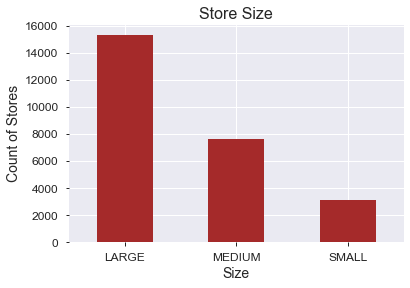

In [115]:
##Plot the stores based on size
st_df3.SIZE.value_counts().plot(kind='bar', color = 'brown')
plt.title('Store Size',fontsize = 16)
plt.xlabel('Size',fontsize=14)
plt.ylabel('Count of Stores',fontsize=14)
plt.xticks(rotation='horizontal',fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Store size.png')



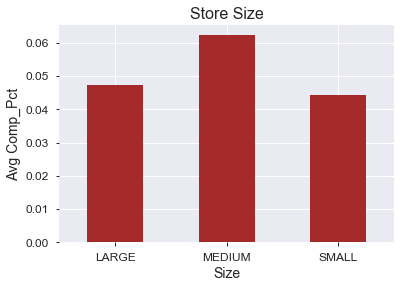

In [116]:

st_df3.groupby('SIZE')['COMP_PCT'].agg('mean').plot(kind='bar', color = 'brown')
plt.title('Store Size',fontsize = 16)
plt.xlabel('Size',fontsize=14)
plt.ylabel('Avg Comp_Pct',fontsize=14);
plt.xticks(rotation='horizontal',fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Store size by Comp_pct.png')


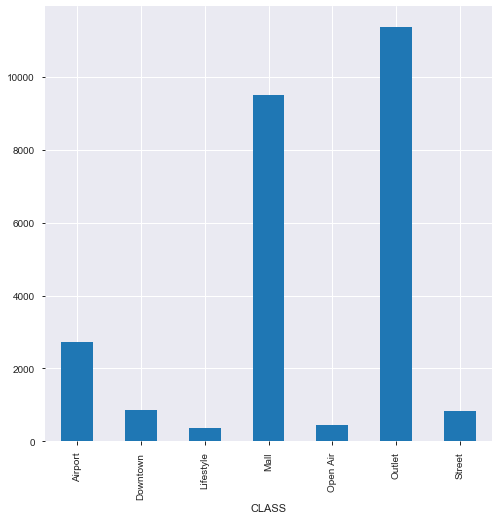

In [118]:
##Count of stores based on class
sales = st_df3.groupby('CLASS')
new_st = sales['SIZE']
agg = new_st.agg('count')
agg.plot(kind='bar',figsize=(8,8),stacked=True)

In [76]:
##pivot table for counting large medium and small stores based on class
pivot_df = st_df3.pivot_table(index=['CLASS'], columns='SIZE', values=['STORE'],aggfunc=np.count_nonzero)
pivot_df

STORE                
SIZE         LARGE  MEDIUM   SMALL
CLASS                             
Airport      171.0   939.0  1607.0
Downtown     352.0   349.0   171.0
Lifestyle    175.0   179.0     NaN
Mall        3758.0  4555.0  1206.0
Open Air       NaN   436.0     NaN
Outlet     10352.0  1017.0     NaN
Street       499.0   179.0   166.0

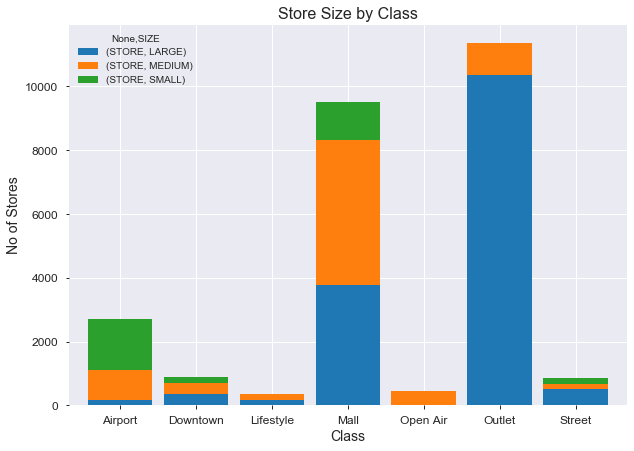

In [96]:
##Plot the stores based on Class and size
pivot_df.plot.bar(stacked=True, figsize=(10,7),width=0.85)
plt.title('Store Size by Class',fontsize = 16)
plt.xlabel('Class',fontsize=14)
plt.ylabel('No of Stores',fontsize=14);
plt.xticks(rotation='horizontal',fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Store size by Class.png')



In [23]:
st_df2.pivot_table(index=['FISCAL_MONTH'],values= ['COMP_PCT','TY_MARK_DOWN_PCT','STRAK_CONVERSION_PCT'], aggfunc = np.mean).nlargest(12,'COMP_PCT')

,COMP_PCT,STRAK_CONVERSION_PCT,TY_MARK_DOWN_PCT
FISCAL_MONTH,,,
6,0.119936,0.124901,0.134478
1,0.081263,0.144377,0.111623
8,0.064948,0.129907,0.106358
7,0.064140,0.122673,0.114435
9,0.063800,0.133513,0.107726
12,0.058446,0.140789,0.120635
2,0.053505,0.140133,0.116584
5,0.049691,0.141300,0.130186
10,0.045168,0.128172,0.147265


In [119]:
## store performance by highest comp_pct and open_date
st_df3.pivot_table(index = ['STORE','OPEN_DATE','CLASS','FISCAL_YEAR','FISCAL_WEEK'], values =['COMP_PCT'],aggfunc = np.mean).sort_values(by='COMP_PCT',ascending=False).head(20)

,,,,,COMP_PCT
STORE,OPEN_DATE,CLASS,FISCAL_YEAR,FISCAL_WEEK,
1508,29-MAY-84,Mall,2019,30,7.945772
1709,06-APR-07,Airport,2017,50,6.630358
1699,01-AUG-16,Street,2018,33,5.554588
1597,15-MAR-87,Mall,2019,38,5.506788
1718,01-MAY-16,Airport,2018,17,4.245985
2045,08-MAR-00,Outlet,2019,32,3.803657
1597,15-MAR-87,Mall,2019,36,3.721613
1824,19-OCT-06,Open Air,2017,18,3.540078
2075,01-JUL-14,Outlet,2017,3,3.342601


In [120]:
##convert the open date in datetime format
st_df3['OPEN_DATE']=pd.to_datetime(st_df2['OPEN_DATE'])

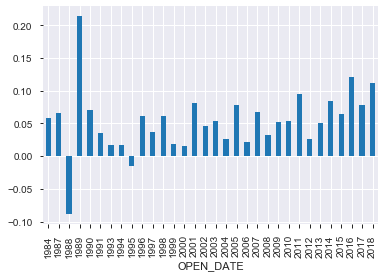

In [122]:
##store performance based on open date
st_df3.groupby(st_df3['OPEN_DATE'].dt.year)['COMP_PCT'].agg('mean').plot(kind='bar')

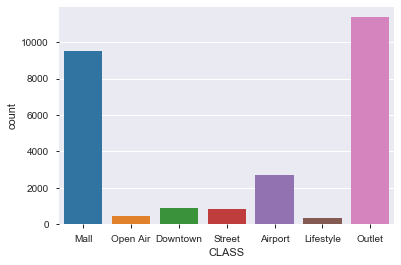

In [123]:
##count of stores based on class
sns.countplot(st_df3.CLASS)

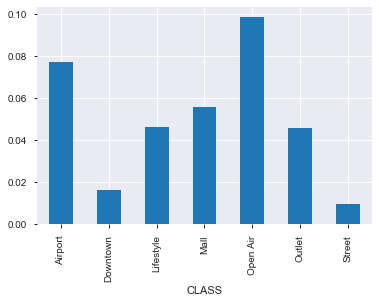

In [124]:
##performance of stores based on comp_pct
st_df3.groupby('CLASS')['COMP_PCT'].agg('mean').plot(kind='bar')

In [39]:
st_df3.head()

,DIV_x,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,...,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV_y,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND,SIZE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,...,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,...,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,...,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,...,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834833,0.511628,0.177998,0.254438,0.745562,0.013234,144.292791,52

In [40]:
st_df3.pivot_table(index=["STORE","CLASS","MGR_COUNT","AM_COUNT","FT_COUNT","AVG_MGR_TENURE_DAYS","AVG_AM_TENURE_DAYS"], values =["COMP_PCT"] , aggfunc=np.mean).sort_values(by='COMP_PCT',ascending=False).head(20)

,,,,,,,COMP_PCT
STORE,CLASS,MGR_COUNT,AM_COUNT,FT_COUNT,AVG_MGR_TENURE_DAYS,AVG_AM_TENURE_DAYS,
1508,Mall,1,1,3,16242.0,3653.0,7.945772
1709,Airport,1,0,0,1919.0,0.0,6.630358
1699,Street,1,1,0,103.0,551.0,5.554588
1597,Mall,1,1,1,1287.0,64.0,5.506788
1718,Airport,1,1,2,894.0,334.0,4.245985
2045,Outlet,1,2,0,1422.0,43.5,3.803657
1597,Mall,1,1,1,1273.0,50.0,3.721613
1824,Open Air,1,0,0,3177.0,0.0,3.540078
2075,Outlet,0,1,0,0.0,1841.0,3.342601


In [41]:
st_df3.pivot_table(index=["STORE","CLASS","AVG_MGR_TENURE_DAYS"], values =["COMP_PCT"] , aggfunc=np.median).nlargest(20,'COMP_PCT')

,,,COMP_PCT
STORE,CLASS,AVG_MGR_TENURE_DAYS,
1508,Mall,16242.0,7.945772
1709,Airport,1919.0,6.630358
1699,Street,103.0,5.554588
1597,Mall,1287.0,5.506788
1718,Airport,894.0,4.245985
2045,Outlet,1422.0,3.803657
1597,Mall,1273.0,3.721613
1824,Open Air,3177.0,3.540078
2071,Outlet,145.0,3.312991


##Histogram for showing correlation between multi amount pct and comp_pct

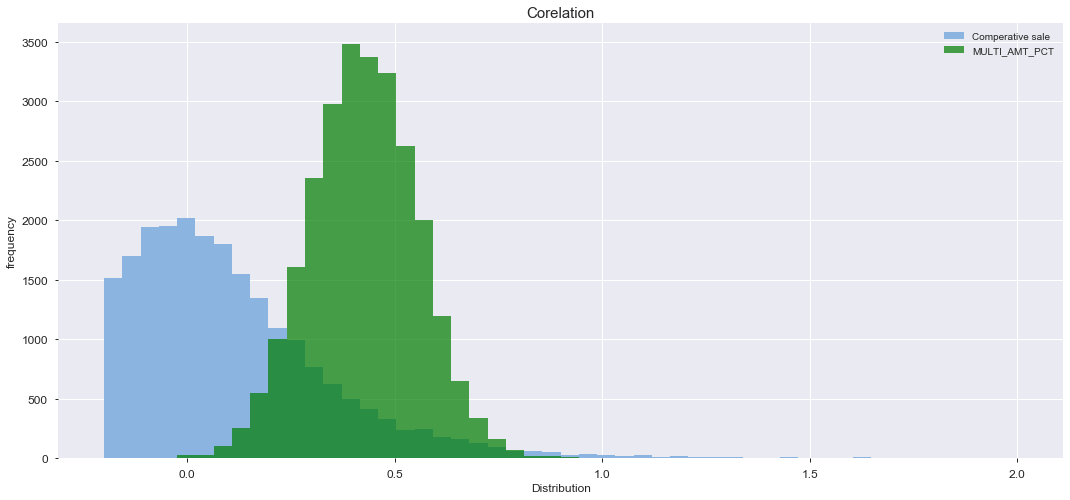

In [126]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(st_df3['COMP_PCT'], color='#8CB4E1', alpha=1.0, bins=50, range = [-0.2,2],
       label='Comperative sale')
ax.hist(st_df3['MULTI_AMT_PCT'], color='#007D00', alpha=0.7, bins=50, range = [-0.2, 2],
       label='MULTI_AMT_PCT')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Corelation', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [53]:
st_df3.head()

,DIV_x,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,...,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,DIV_y,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND,SIZE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,...,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,...,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,...,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,7,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2,LARGE
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,...,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834833,0.511628,0.177998,0.254438,0.745562,0.013234,144.292791,52

# Function for getting top ten records for each year for each state

In [128]:
def get_Top_store(state, year):
    st_avg = st_df3[(st_df3.STORE_STATE== state)&(st_df3.FISCAL_YEAR== year)].groupby(['FISCAL_MONTH','CLASS','STORE_CITY'])['COMP_PCT','AVG_MGR_TENURE_DAYS','AVG_AM_TENURE_DAYS','TOT_AVG_TENURE_DAYS'].agg('mean').nlargest(10,'COMP_PCT')
    return st_avg

Call the function 

In [130]:
##Top ten stores for New Jersey
get_Top_store('NJ', 2018)

,,,COMP_PCT,AVG_MGR_TENURE_DAYS,AVG_AM_TENURE_DAYS,TOT_AVG_TENURE_DAYS
FISCAL_MONTH,CLASS,STORE_CITY,,,,
1,Outlet,TINTON FALLS,0.345194,1800.5,348.5,682.50
10,Mall,SHORT HILLS,0.336049,10806.5,10708.5,4737.00
7,Mall,SHORT HILLS,0.173137,10715.5,10617.5,4641.25
8,Mall,SHORT HILLS,0.168754,10743.5,10645.5,4866.50
6,Mall,SHORT HILLS,0.150580,10684.0,10586.0,4018.00
3,Airport,NEWARK,0.144289,4213.0,446.0,2359.00
8,Airport,NEWARK,0.141191,4363.5,680.5,2605.50
1,Airport,NEWARK,0.114324,4153.5,386.5,2588.50
5,Mall,SHORT HILLS,0.108777,10652.5,10554.5,3806.50


In [131]:
##top ten stores for TN in 2017
get_Top_store('TN', 2017)

,,,COMP_PCT,AVG_MGR_TENURE_DAYS,AVG_AM_TENURE_DAYS,TOT_AVG_TENURE_DAYS
FISCAL_MONTH,CLASS,STORE_CITY,,,,
1,Outlet,SEVIERVILLE,0.366135,566.5,680.50,852.5
12,Street,NASHVILLE,0.363757,2775.0,6591.00,4622.0
4,Mall,FRANKLIN,0.340932,1015.5,778.50,812.5
1,Mall,FRANKLIN,0.306534,924.5,687.50,721.5
8,Outlet,SEVIERVILLE,0.204727,776.5,29.50,918.5
7,Outlet,SEVIERVILLE,0.199450,748.5,4.25,979.5
2,Outlet,SEVIERVILLE,0.191960,594.5,708.50,880.5
4,Outlet,SEVIERVILLE,0.161266,654.0,768.00,940.0
11,Street,NASHVILLE,0.156866,2743.5,6559.50,4590.5


In [158]:
##function for top store for each state and each year for different matrix
def get_store(state, year):
    st_avg = st_df3[(st_df3.STORE_STATE== state)&(st_df3.FISCAL_YEAR== year)].groupby(['FISCAL_MONTH','CLASS','STORE_CITY'])['COMP_PCT','SALES_VALUE','MULTI_UNITS','MULTI_VALUE','ACCESSORY_VALUE','SHOE_MULTI_PCT'].agg('mean').nlargest(10,'COMP_PCT')
    return st_avg

In [159]:
##Call the function
get_store('NY',2018)

COMP_PCT  SALES_VALUE  MULTI_UNITS  \
FISCAL_MONTH CLASS  STORE_CITY                                               
8            Street NEW YORK            2.918285   21073.0050    23.000000   
6            Outlet RIVERHEAD           0.296737   14328.5760    52.000000   
10           Mall   HUNTINGTON STATION  0.271683   33271.2875    49.250000   
6            Outlet CENTRAL VALLEY      0.267146   22557.0080    91.600000   
5            Outlet SYRACUSE            0.228477    8972.7700    35.750000   
1            Outlet CENTRAL VALLEY      0.216872   19580.8500    80.500000   
12           Outlet NIAGARA FALLS       0.214552   12715.4260    40.400000   
10           Outlet NIAGARA FALLS       0.199208   28970.9425   107.000000   
                    SYRACUSE            0.188747   16764.3400    55.333333   
6            Mall   HUNTINGTON STATION  0.187533   19738.1740    41.200000   

                                        MULTI_VALUE  ACCESSORY_VALUE  \
FISCAL_MONTH CLASS  STORE_CITY                                         
8            Street NEW YORK            3824.555000        7726.1600   
6            Outlet RIVERHEAD           5113.750000        4395.7260   
10           Mall   HUNTINGTON STATION  8290.145000       11435.9575   
6            Outlet CENTRAL VALLEY      8374.792000        7207.4100   
5            Outlet SYRACUSE            2813.690000        2914.8250   
1            Outlet CENTRAL VALLEY      8291.140000        5232.8850   
12           Outlet NIAGARA FALLS       3873.044000        3800.9700   
10           Outlet NIAGARA FALLS       9501.035000       10568.3200   
                    SYRACUSE            4934.413333        6820.7300   
6            Mall   HUNTINGTON STATION  5548.432000        5709.5000   

                                        SHOE_MULTI_PCT  
FISCAL_MONTH CLASS  STORE_CITY                          
8            Street NEW YORK                  0.289523  
6            Outlet RIVERHEAD                 0.526824  
10           Mall   HUNTINGTON STATION        0.374968  
6            Outlet CENTRAL VALLEY            0.582740  
5            Outlet SYRACUSE                  0.533500  
1            Outlet CENTRAL VALLEY            0.561052  
12           Outlet NIAGARA FALLS             0.449988  
10           Outlet NIAGARA FALLS             0.520993  
                    SYRACUSE                  0.506007  
6            Mall   HUNTINGTON STATION        0.401488

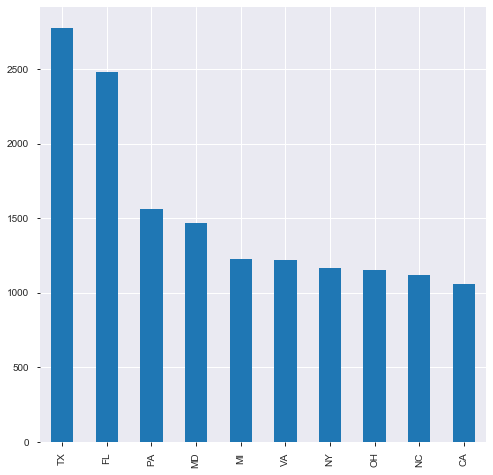

In [132]:
##which state has the highest no of stores
st_df3.STORE_STATE.value_counts().head(10).plot(kind='bar',figsize=(8,8))

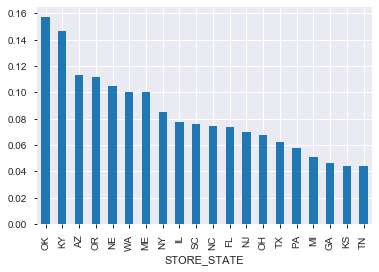

In [136]:
##Sort the state based on highest comp_pct
st_df3.groupby('STORE_STATE')['COMP_PCT'].agg('mean').sort_values(ascending=False).head(20).plot(kind='bar')

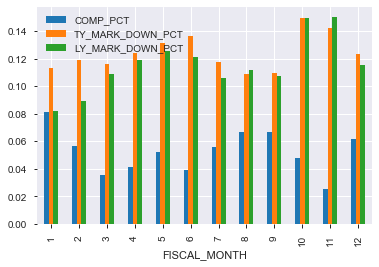

In [137]:
##finding the corelation between mark_down and comp_pct
st_df3.groupby('FISCAL_MONTH')['COMP_PCT','TY_MARK_DOWN_PCT','LY_MARK_DOWN_PCT'].agg('mean').plot(kind='bar')

In [138]:
##find a correlation between strak data and comp_pct
new1 = st_df3[['COMP_PCT','STRAK_CONVERSION_PCT','STRAK_SLS_PER_SHOPPER','STRAK_AVG_TRANS_SIZE','STRAK_SHOPPER_TO_ASSOC_RATIO','STRAK_COMP_TRAFFIC_DELTA','GROSS_FEET']]
corr = new1.corr()
print(corr['COMP_PCT'].sort_values(ascending=False))

COMP_PCT                        1.000000
STRAK_COMP_TRAFFIC_DELTA        0.988813
STRAK_AVG_TRANS_SIZE            0.190478
STRAK_SLS_PER_SHOPPER           0.144210
STRAK_SHOPPER_TO_ASSOC_RATIO    0.084240
STRAK_CONVERSION_PCT            0.065402
GROSS_FEET                     -0.004172
Name: COMP_PCT, dtype: float64


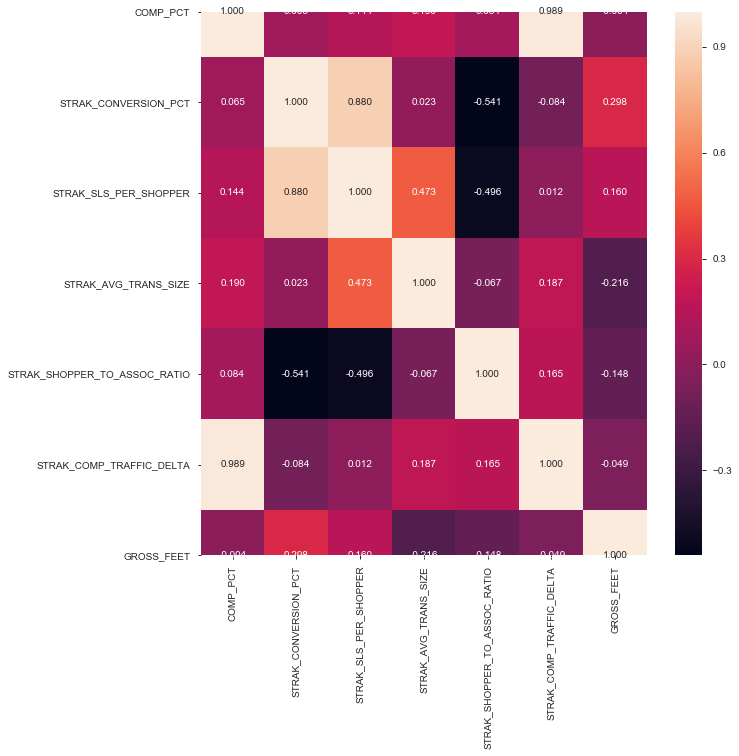

In [139]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

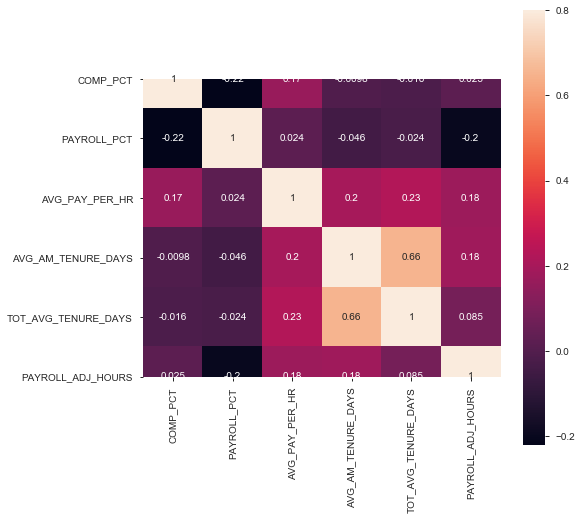

In [141]:
##find the correlation between tenure and payroll and comp_pct
corrmat = st_df3[['COMP_PCT', 'PAYROLL_PCT','AVG_PAY_PER_HR' ,'AVG_AM_TENURE_DAYS','TOT_AVG_TENURE_DAYS','PAYROLL_ADJ_HOURS']].corr()

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

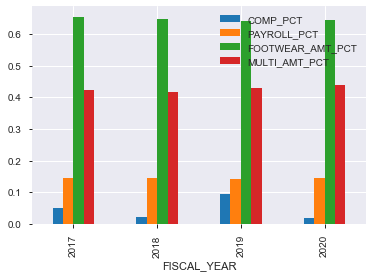

In [142]:
##group by percent data for each year
st_df3.groupby('FISCAL_YEAR')['COMP_PCT','PAYROLL_PCT','FOOTWEAR_AMT_PCT','MULTI_AMT_PCT'].agg('mean').plot(kind='bar')



In [155]:
##pivot table for store by comp_pct
st_df3.pivot_table(index=['STORE','OPEN_DATE','STORE_CITY','STORE_STATE','CLASS'],values=['COMP_PCT'], aggfunc = np.mean).sort_values(by="COMP_PCT",ascending=True).head(10)

,,,,,COMP_PCT
STORE,OPEN_DATE,STORE_CITY,STORE_STATE,CLASS,
1849,2017-11-01,LOS ANGELES,CA,Mall,-0.168166
1603,1988-09-15,BURLINGTON,MA,Mall,-0.088572
1817,2004-01-01,WASHINGTON,DC,Street,-0.064134
1600,1987-03-18,BIRMINGHAM,AL,Mall,-0.063231
2067,2006-05-01,QUEENSTOWN,MD,Outlet,-0.049205
1504,2012-05-01,LAS VEGAS,NV,Mall,-0.041804
1726,2013-05-01,HOUSTON,TX,Airport,-0.038136
1672,1999-03-12,NORFOLK,VA,Downtown,-0.028549
1854,2000-12-01,SAN FRANCISCO,CA,Street,-0.027329


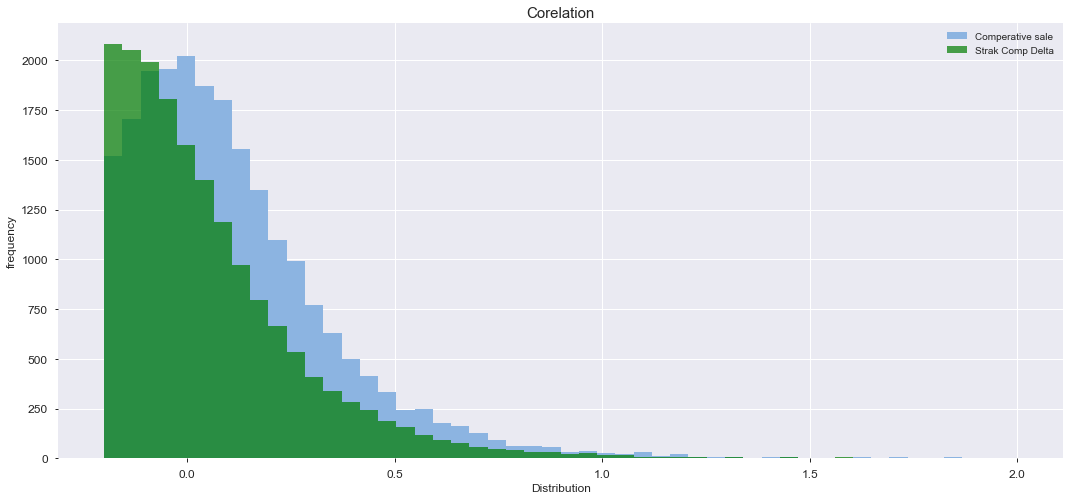

In [156]:
##corelation between strak comp traffic delta and comp_pct
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(st_df3['COMP_PCT'], color='#8CB4E1', alpha=1.0, bins=50, range = [-0.2,2],
       label='Comperative sale')
ax.hist(store_df['STRAK_COMP_TRAFFIC_DELTA'], color='#007D00', alpha=0.7, bins=50, range = [-0.2, 2],
       label='Strak Comp Delta')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Corelation', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()